In [16]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pylab as pt

In [17]:
im = Image.open("Lab4-image.png")

In [18]:
im.show()
im_array = np.asarray(im)

In [19]:
print(im_array.shape)

(331, 508, 3)


In [55]:
#Function that convert rgb image to gray scale
def convert_to_grayscale(image):
    #Converting the Image into the Grayscale image
    rgb = np.asarray(image)
    #Seperating the R,G,B arrays into separates r,g,b numpy array
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]

    #finally adding all r,g,b to gray plus multiplying with some parameters
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [56]:
# Function for binary threshold
def binary_threshold(image,threshold):
    #initializing a image size numpy array of zeros
    binary = np.zeros(image.shape, dtype = 'int')
    #iterating over every row of gray scale image
    for i in range(binary.shape[0]):
        #iterating over every element of the row
        for j in range(binary.shape[1]):
            #check the pixel particular
            if image[i][j] < threshold:
                binary[i][j] = 0
            else:
                binary[i][j] = 1
    return binary



## Generating the Binary Image from GrayScale


In [57]:
#predifined threshold value
threshold_value = 127
#first converting to grayscale
gray = convert_to_grayscale(im)
#converting into binary image
image = binary_threshold(gray,threshold_value)



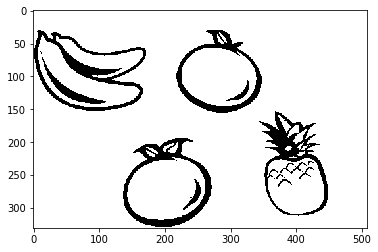

In [58]:
pt.imshow(image, cmap = 'gray')

In [59]:
image.shape


(331, 508)

In [60]:
image_copy = np.copy(image)
rows,columns = image_copy.shape

#  Connecting Labeling Algorithm


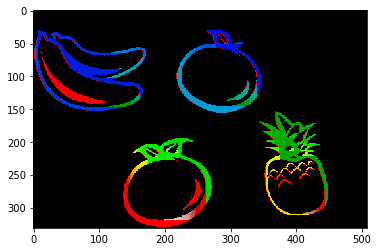

In [61]:
#Generating the zeros array of the size of original image
zeros = np.zeros(shape=(rows, columns)).tolist()
threshold = 127
#to keep track of the component Numbers
componentNumber = dict()

for row in range(0, rows):
    for col in range(0, columns):
        #Checking in the pixel value is zeros
        if image_copy[row][col] == 0:
            upper = 0
            left = 0
            if row == 0:
                upper = 0
            else:
                upper = zeros[row - 1][col]
            if col == 0:
                left = 0
            else:
                left = zeros[row][col - 1]
            if left == 0 and upper == 0:
                threshold = threshold+1
                zeros[row][col] = threshold
            elif left > 0 and upper == 0:
                zeros[row][col] = left
            elif upper > 0  and left == 0:
                zeros[row][col] = top
            elif upper > 0 and left > 0 and left == upper:
                zeros[row][col] = left
            elif upper > 0 and left > 0 and not left == upper:
                zeros[row][col] = int(min(left, upper))
                componentNumber[int(min(upper, left))] = int(min(left, upper))

#Generating array of pixels values from componentNumber Dictionary               
values = componentNumber.keys()
image = np.array(zeros)
plt.imshow(image, cmap="nipy_spectral")
plt.show()